<a href="https://colab.research.google.com/github/maurofama99/ann_challenge/blob/main/ANN_challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/ANN/data1

/gdrive/My Drive/ANN/data1


Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


seed for reproducivity

In [4]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

suppress warnings

In [5]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

unzip img (data) file

In [ ]:
# Load the dataset to be used for classification
!unzip training_dataset_homework1.zip

In [6]:
# Dataset folders 
dataset_dir = 'training_data_final'

#generate 2 folders for validation and training
training_dir = os.path.join(dataset_dir, 'training')
if not os.path.exists(training_dir):
  os.mkdir(training_dir)
validation_dir = os.path.join(dataset_dir, 'validation')
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

In [ ]:
#get the number of img of each species
import fnmatch

count = [0,0,0,0,0,0,0,0]
labels = ['Species1',       # 0
          'Species2',       # 1
          'Species3',       # 2
          'Species4',       # 3
          'Species5',       # 4
          'Species6',       # 5
          'Species7',       # 6
          'Species8']       # 7

for i in range(len(labels)):
  dir_path = os.path.join(dataset_dir, labels[i])
  print(dir_path)
  count[i] = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
  print('The number of img of', labels[i], 'is: ', count[i])

cumsum = np.cumsum(count)
print('Total amount of img is: ', cumsum[len(cumsum)-1] )

NameError: ignored

In [7]:
import fnmatch

count = [0,0,0,0,0,0,0,0]
labels = ['Species1',       # 0
          'Species2',       # 1
          'Species3',       # 2
          'Species4',       # 3
          'Species5',       # 4
          'Species6',       # 5
          'Species7',       # 6
          'Species8']       # 7
for i in range(len(labels)):
  dir_path = os.path.join(training_dir, labels[i])
  path = os.path.join(validation_dir, labels[i])
  count[i] = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
  count[i] += len(fnmatch.filter(os.listdir(path), '*.*'))

In [8]:
count

[186, 532, 515, 511, 531, 222, 537, 508]

In [8]:
#amount for train and validation= 70, 30
import math
p = 0.7
amount_train = np.zeros(shape=(8,), dtype=int)
amount_val = np.zeros(shape=(8,), dtype=int)
for i in range(len(labels)):
  amount_train[i] = math.ceil(count[i] * p)
  amount_val[i] = count[i] - amount_train[i]
print(amount_train,amount_val)

[131 373 361 358 372 156 376 356] [ 55 159 154 153 159  66 161 152]


In [ ]:
import shutil
i = 0;
for i in range(len(labels)):
  class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
  print(class_imgs)
  old_dir = os.path.join(dataset_dir, labels[i])
  dir_path_train = os.path.join(training_dir, labels[i])
  os.mkdir(dir_path_train)
  dir_path_val = os.path.join(validation_dir, labels[i])
  os.mkdir(dir_path_val)
  for j in range(amount_train[i]):
    dir_path1 = os.path.join(dataset_dir, labels[i], class_imgs[j])
    print(dir_path1)
    print(dir_path_train)
    shutil.move(dir_path1, dir_path_train)
  for w in range(1, amount_val[i]+1):
    dir_path2 = os.path.join(dataset_dir, labels[i], class_imgs[w+j])
    print(dir_path2)
    print(dir_path_val)
    shutil.move(dir_path2, dir_path_val)
  os.rmdir(old_dir)


  

In [ ]:
class_imgs = next(os.walk('{}/{}/'.format(training_dir, labels[2])))[2]
print(class_imgs)

['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg'

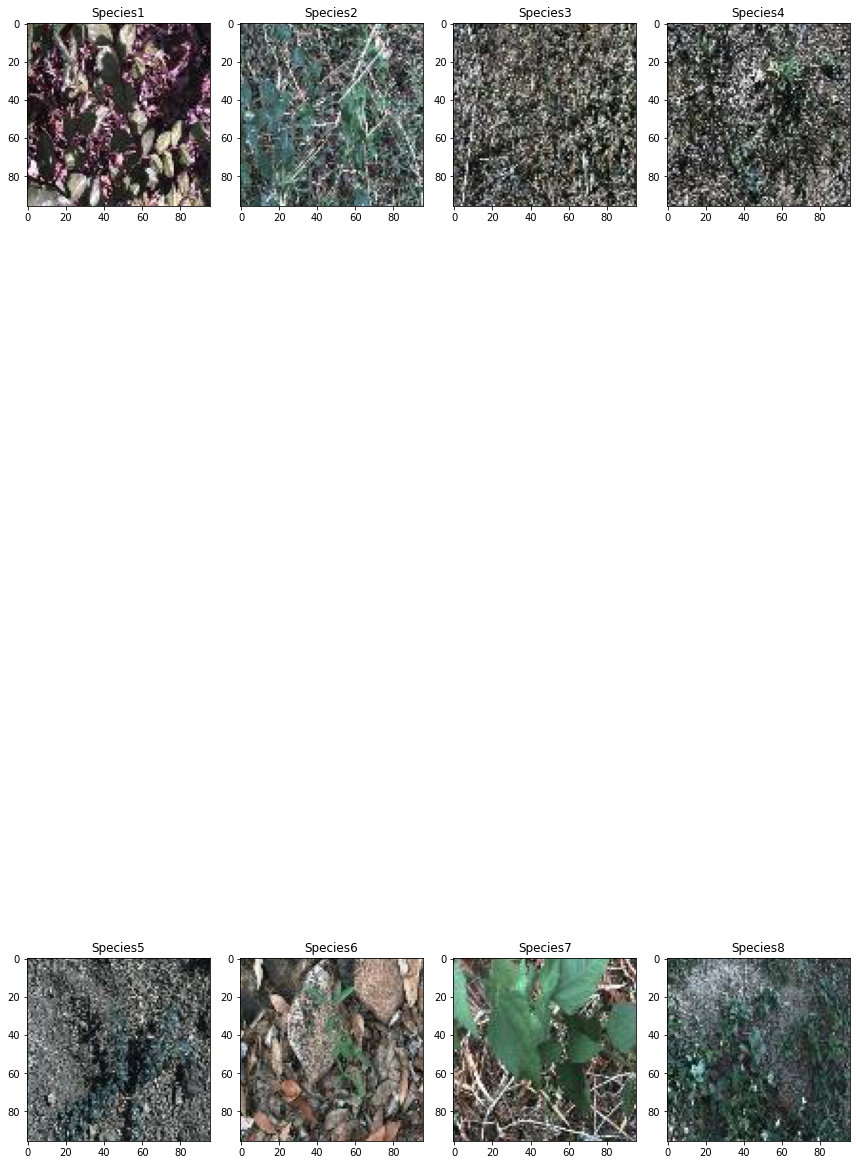

In [ ]:
#data visualization

num_row = 2
num_col = 4
fig, axes = plt.subplots(num_row, num_col, figsize=(6*num_row,9*num_col))
for i in range(num_row*num_col):
  if i < 8:
    class_imgs = next(os.walk('{}/{}/'.format(training_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(training_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [11]:
# Images are divided into folders, one for each class. 
# If the images are organized in such a way, we can exploit the 
# ImageDataGenerator to read them from disk.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for training and validation sets
train_data_gen = ImageDataGenerator()
valid_data_gen = ImageDataGenerator()

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)
valid_gen = train_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)

Found 2483 images belonging to 8 classes.
Found 1059 images belonging to 8 classes.


sum = 3542 (verified!!)

In [11]:
print("Assigned labels")
print(train_gen.class_indices)
print()
print("Target classes")
print(train_gen.classes)

Assigned labels
{'Species1': 0, 'Species2': 1, 'Species3': 2, 'Species4': 3, 'Species5': 4, 'Species6': 5, 'Species7': 6, 'Species8': 7}

Target classes
[0 0 0 ... 7 7 7]


In [9]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (8, 96, 96, 3)
Target shape: (8, 8)

Categorical label: [0. 0. 0. 0. 1. 0. 0. 0.]
Label: 4
Class name: Species5


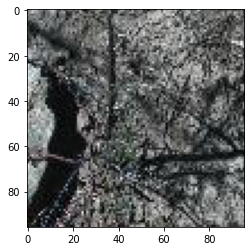

In [13]:
# Get a sample from dataset and show info
_ = get_next_batch(train_gen)

In [12]:
# Create an instance of ImageDataGenerator with NO Data Augmentation
noaug_train_data_gen = ImageDataGenerator(rescale=1/255.) # rescale value is multiplied to the image
valid_data_gen = ImageDataGenerator(rescale=1/255.)

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
noaug_train_gen = noaug_train_data_gen.flow_from_directory(directory=training_dir,
                                                           target_size=(96,96),
                                                           color_mode='rgb',
                                                           classes=None, # can be set to labels
                                                           class_mode='categorical',
                                                           batch_size=8,
                                                           shuffle=True,
                                                           seed=seed)
valid_gen = valid_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)

Found 2483 images belonging to 8 classes.
Found 1059 images belonging to 8 classes.


Metadata

In [13]:
input_shape = (96, 96, 3)
epochs = 200

In [14]:
def build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    conv1 = tfkl.Conv2D(
        filters=32,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling2D()(conv1)

    conv2 = tfkl.Conv2D(
        filters=64,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling2D()(conv2)

    conv3 = tfkl.Conv2D(
        filters=128,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D()(conv3)

    conv4 = tfkl.Conv2D(
        filters=256,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool3)
    pool4 = tfkl.MaxPooling2D()(conv4)

    conv5 = tfkl.Conv2D(
        filters=512,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool4)
    pool5 = tfkl.MaxPooling2D()(conv5)

    flattening_layer = tfkl.Flatten(name='Flatten')(pool5)
    dropout = tfkl.Dropout(0.3, seed=seed)(flattening_layer)
    classifier_layer = tfkl.Dense(units=512, name='Classifier', kernel_initializer=tfk.initializers.HeUniform(seed), activation='relu')(dropout)
    dropout = tfkl.Dropout(0.3, seed=seed)(classifier_layer)
    output_layer = tfkl.Dense(units=8, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='output_layer')(dropout)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [15]:
# Utility function to create folders and callbacks for training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('data_augmentation_experiments')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=True, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
  callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  # ---------------------------------
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping
  # --------------
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

In [16]:
# Build model (for NO augmentation training)
model = build_model(input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856 

In [17]:
# Create folders and callbacks and fit
noaug_callbacks = create_folders_and_callbacks(model_name='CNN_NoAug')

# Train the model
history = model.fit(
    x = noaug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = noaug_callbacks,
).history

Epoch 1/200
311/311 [==============================] - 501s 2s/step - loss: 1.9949 - accuracy: 0.2437 - val_loss: 1.6727 - val_accuracy: 0.3466
Epoch 2/200
311/311 [==============================] - 9s 29ms/step - loss: 1.6896 - accuracy: 0.3057 - val_loss: 1.5611 - val_accuracy: 0.3890
Epoch 3/200
311/311 [==============================] - 9s 29ms/step - loss: 1.5134 - accuracy: 0.4108 - val_loss: 1.4883 - val_accuracy: 0.4325
Epoch 4/200
311/311 [==============================] - 9s 30ms/step - loss: 1.4383 - accuracy: 0.4350 - val_loss: 1.5022 - val_accuracy: 0.3654
Epoch 5/200
311/311 [==============================] - 10s 31ms/step - loss: 1.3402 - accuracy: 0.4889 - val_loss: 1.3658 - val_accuracy: 0.4816
Epoch 6/200
311/311 [==============================] - 9s 30ms/step - loss: 1.2934 - accuracy: 0.5087 - val_loss: 1.3050 - val_accuracy: 0.4759
Epoch 7/200
311/311 [==============================] - 9s 29ms/step - loss: 1.1721 - accuracy: 0.5485 - val_loss: 1.2319 - val_accuracy

In [18]:
# Save best epoch model
model.save("data_augmentation_experiments/CNN_NoAug_Best")

In [19]:
model.load_weights("data_augmentation_experiments/CNN_NoAug_Best")

In [20]:
"Given functions"
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def plot_confusionMatrix(test_labels, test_predicted):
  print("val labels: ", test_labels)
  print("labels predicted: ", test_predicted)
  cm = confusion_matrix(test_labels, test_predicted, labels=[0,1,2,3,4,5,6,7])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels)
  disp.plot()
  plt.show()
  return 


In [21]:

def testModel( valid_gen, model):

  # d. Predit test labels
  test_predicted = model.predict(valid_gen)
  test_predicted = np.argmax(test_predicted, axis=-1)
  

  # e. plot confusion matrix
  plot_confusionMatrix(valid_gen.classes, test_predicted)

  # f. display classification results
  print(classification_report(valid_gen.classes, test_predicted, target_names=labels))

133/133 [==============================] - 2s 16ms/step
val labels:  [0 0 0 ... 7 7 7]
labels predicted:  [1 1 4 ... 1 7 7]


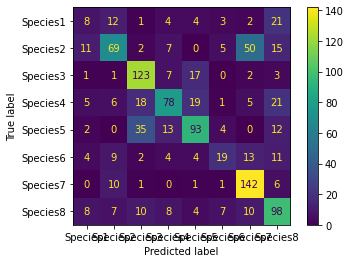

              precision    recall  f1-score   support

    Species1       0.21      0.15      0.17        55
    Species2       0.61      0.43      0.51       159
    Species3       0.64      0.80      0.71       154
    Species4       0.64      0.51      0.57       153
    Species5       0.65      0.58      0.62       159
    Species6       0.47      0.29      0.36        66
    Species7       0.63      0.88      0.74       161
    Species8       0.52      0.64      0.58       152

    accuracy                           0.59      1059
   macro avg       0.55      0.54      0.53      1059
weighted avg       0.59      0.59      0.58      1059



In [22]:
"Define baseline model"
from sklearn import svm

testModel(valid_gen, model)#use validation not TEST set!######

retrain the model with weights

In [32]:
model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

In [33]:
# Create folders and callbacks and fit
noaug_callbacks = create_folders_and_callbacks(model_name='CNN_1')

# Train the model
history = model.fit(
    x = noaug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    class_weight = {0: 3542/186, 1: 3542/532, 2: 3542/515, 3: 3542/511, 4: 3542/531, 
                    5: 3542/222, 6: 3542/537, 7: 3542/508},
    callbacks = noaug_callbacks,
).history

Epoch 1/200
311/311 [==============================] - 9s 28ms/step - loss: 1.7659 - accuracy: 0.9219 - val_loss: 2.3243 - val_accuracy: 0.5722
Epoch 2/200
311/311 [==============================] - 10s 31ms/step - loss: 1.8597 - accuracy: 0.9235 - val_loss: 2.3266 - val_accuracy: 0.5496
Epoch 3/200
311/311 [==============================] - 10s 31ms/step - loss: 1.3776 - accuracy: 0.9412 - val_loss: 3.1292 - val_accuracy: 0.5751
Epoch 4/200
311/311 [==============================] - 9s 28ms/step - loss: 1.6002 - accuracy: 0.9388 - val_loss: 3.2429 - val_accuracy: 0.5430
Epoch 5/200
311/311 [==============================] - 9s 29ms/step - loss: 1.5563 - accuracy: 0.9400 - val_loss: 2.6671 - val_accuracy: 0.6081
Epoch 6/200
311/311 [==============================] - 9s 28ms/step - loss: 0.5008 - accuracy: 0.9787 - val_loss: 3.4023 - val_accuracy: 0.5675
Epoch 7/200
311/311 [==============================] - 9s 28ms/step - loss: 1.7463 - accuracy: 0.9279 - val_loss: 2.7782 - val_accurac

In [34]:
# Save best epoch model
model.save("data_augmentation_experiments/CNN_NoAug2_Best")

In [35]:
model.load_weights("data_augmentation_experiments/CNN_NoAug2_Best")

133/133 [==============================] - 2s 15ms/step
val labels:  [0 0 0 ... 7 7 7]
labels predicted:  [1 3 3 ... 1 7 1]


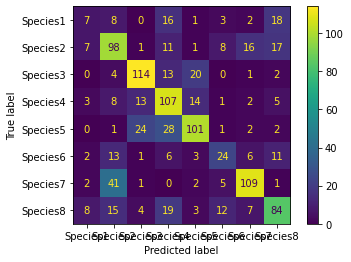

              precision    recall  f1-score   support

    Species1       0.24      0.13      0.17        55
    Species2       0.52      0.62      0.56       159
    Species3       0.72      0.74      0.73       154
    Species4       0.54      0.70      0.61       153
    Species5       0.70      0.64      0.66       159
    Species6       0.44      0.36      0.40        66
    Species7       0.75      0.68      0.71       161
    Species8       0.60      0.55      0.58       152

    accuracy                           0.61      1059
   macro avg       0.56      0.55      0.55      1059
weighted avg       0.61      0.61      0.60      1059



In [36]:
testModel(valid_gen, model)

##Add class weights

In [37]:
# Build model (for NO augmentation training)
model1 = build_model(input_shape)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)       73856 

In [38]:
# Create folders and callbacks and fit
noaug_callbacks = create_folders_and_callbacks(model_name='CNN_1')

# Train the model
history = model1.fit(
    x = noaug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    class_weight = {0: 3542/186, 1: 3542/532, 2: 3542/515, 3: 3542/511, 4: 3542/531, 
                    5: 3542/222, 6: 3542/537, 7: 3542/508},
    callbacks = noaug_callbacks,
).history

Epoch 1/200
311/311 [==============================] - 11s 33ms/step - loss: 16.4752 - accuracy: 0.2018 - val_loss: 1.7995 - val_accuracy: 0.3296
Epoch 2/200
311/311 [==============================] - 10s 33ms/step - loss: 14.2980 - accuracy: 0.2900 - val_loss: 1.6807 - val_accuracy: 0.3560
Epoch 3/200
311/311 [==============================] - 9s 30ms/step - loss: 13.8056 - accuracy: 0.3105 - val_loss: 1.5567 - val_accuracy: 0.3324
Epoch 4/200
311/311 [==============================] - 10s 33ms/step - loss: 13.0093 - accuracy: 0.3770 - val_loss: 1.4755 - val_accuracy: 0.4079
Epoch 5/200
311/311 [==============================] - 12s 39ms/step - loss: 12.2089 - accuracy: 0.4132 - val_loss: 1.4932 - val_accuracy: 0.4419
Epoch 6/200
311/311 [==============================] - 11s 37ms/step - loss: 11.1182 - accuracy: 0.4672 - val_loss: 1.3793 - val_accuracy: 0.4466
Epoch 7/200
311/311 [==============================] - 9s 29ms/step - loss: 10.1932 - accuracy: 0.5070 - val_loss: 1.2414 - v

In [41]:
# Save best epoch model
model1.save("data_augmentation_experiments/CNN1_Best")

In [42]:
model1.load_weights("data_augmentation_experiments/CNN1_Best")

XX
133/133 [==============================] - 2s 16ms/step
[1 0 3 ... 1 7 5]
XXX
[0 0 0 ... 7 7 7] [1 0 3 ... 1 7 5]


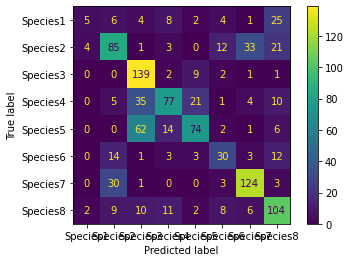

              precision    recall  f1-score   support

    Species1       0.45      0.09      0.15        55
    Species2       0.57      0.53      0.55       159
    Species3       0.55      0.90      0.68       154
    Species4       0.65      0.50      0.57       153
    Species5       0.67      0.47      0.55       159
    Species6       0.48      0.45      0.47        66
    Species7       0.72      0.77      0.74       161
    Species8       0.57      0.68      0.62       152

    accuracy                           0.60      1059
   macro avg       0.58      0.55      0.54      1059
weighted avg       0.60      0.60      0.59      1059



In [43]:
"Define baseline model"
from sklearn import svm

testModel(valid_gen, model1)

#VGG16

In [27]:
# Download and plot the VGG16 model
supernet = tfk.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(96,96,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [28]:
for layer in supernet.layers:
    layer.trainable = False

In [29]:
def pre_build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    vgg16_layer = supernet(input_layer) 

    flattening_layer = tfkl.Flatten(name='Flatten')(vgg16_layer)

    layer1 = tfkl.Dense(units=512, kernel_initializer = tfk.initializers.HeUniform(seed), activation='relu')(flattening_layer)

    dropout1 = tfkl.Dropout(0.3, seed=seed)(layer1)

    classifier_layer = tfkl.Dense(units=256, name='Classifier', kernel_initializer = tfk.initializers.HeUniform(seed), activation='relu')(dropout1)

    dropout2 = tfkl.Dropout(0.3, seed=seed)(classifier_layer)

    output_layer = tfkl.Dense(units=8, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='output_layer')(dropout2)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [30]:
vgg16 = pre_build_model(input_shape)
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 96, 96, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 Flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 512)               2359808   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 Classifier (Dense)          (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0     

In [31]:
# Create folders and callbacks and fit
noaug_callbacks = create_folders_and_callbacks(model_name='CNN_VGG16')

# Train the model
history = vgg16.fit(
    x = noaug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = noaug_callbacks,
).history

Epoch 1/200
311/311 [==============================] - 13s 37ms/step - loss: 1.7674 - accuracy: 0.3355 - val_loss: 1.3510 - val_accuracy: 0.4929
Epoch 2/200
311/311 [==============================] - 11s 37ms/step - loss: 1.3930 - accuracy: 0.4652 - val_loss: 1.3113 - val_accuracy: 0.5175
Epoch 3/200
311/311 [==============================] - 11s 36ms/step - loss: 1.2932 - accuracy: 0.5195 - val_loss: 1.2273 - val_accuracy: 0.5316
Epoch 4/200
311/311 [==============================] - 12s 38ms/step - loss: 1.1852 - accuracy: 0.5513 - val_loss: 1.1726 - val_accuracy: 0.5751
Epoch 5/200
311/311 [==============================] - 11s 36ms/step - loss: 1.1271 - accuracy: 0.5799 - val_loss: 1.1838 - val_accuracy: 0.5713
Epoch 6/200
311/311 [==============================] - 11s 36ms/step - loss: 1.0476 - accuracy: 0.6065 - val_loss: 1.1374 - val_accuracy: 0.5807
Epoch 7/200
311/311 [==============================] - 11s 36ms/step - loss: 1.0047 - accuracy: 0.6428 - val_loss: 1.1103 - val_ac

In [37]:
# Save best epoch model
vgg16.save("data_augmentation_experiments/CNN_VGG16_Best")

In [47]:
vgg16.load_weights("data_augmentation_experiments/CNN_VGG16_Best")

133/133 [==============================] - 2s 17ms/step
val labels:  [0 0 0 ... 7 7 7]
labels predicted:  [1 7 2 ... 3 7 7]


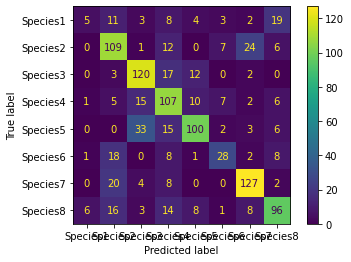

              precision    recall  f1-score   support

    Species1       0.38      0.09      0.15        55
    Species2       0.60      0.69      0.64       159
    Species3       0.67      0.78      0.72       154
    Species4       0.57      0.70      0.63       153
    Species5       0.74      0.63      0.68       159
    Species6       0.58      0.42      0.49        66
    Species7       0.75      0.79      0.77       161
    Species8       0.67      0.63      0.65       152

    accuracy                           0.65      1059
   macro avg       0.62      0.59      0.59      1059
weighted avg       0.65      0.65      0.64      1059



In [39]:
testModel(valid_gen, vgg16)

#Now by making its params treinable

In [51]:
vgg16_2 = tfk.models.load_model("data_augmentation_experiments/CNN_VGG16_Best")

In [52]:
vgg16_2.get_layer('vgg16').trainable = True

In [53]:
vgg16_2.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
vgg16_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 96, 96, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 Flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 512)               2359808   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 Classifier (Dense)          (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0     

In [54]:
# Create folders and callbacks and fit
noaug_callbacks = create_folders_and_callbacks(model_name='CNN_VGG16_2')

# Train the model
history = vgg16_2.fit(
    x = noaug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    class_weight = {0: 3542/186, 1: 3542/532, 2: 3542/515, 3: 3542/511, 4: 3542/531, 
                    5: 3542/222, 6: 3542/537, 7: 3542/508},
    callbacks = noaug_callbacks,
).history

Epoch 1/200
311/311 [==============================] - 20s 62ms/step - loss: 22.3084 - accuracy: 0.1317 - val_loss: 2.0911 - val_accuracy: 0.0519
Epoch 2/200
311/311 [==============================] - 19s 60ms/step - loss: 16.7060 - accuracy: 0.1446 - val_loss: 2.0661 - val_accuracy: 0.1445
Epoch 3/200
311/311 [==============================] - 19s 62ms/step - loss: 16.6789 - accuracy: 0.1393 - val_loss: 2.0819 - val_accuracy: 0.1501
Epoch 4/200
311/311 [==============================] - 18s 58ms/step - loss: 16.6598 - accuracy: 0.1240 - val_loss: 2.0804 - val_accuracy: 0.1501
Epoch 5/200
310/311 [============================>.] - ETA: 0s - loss: 16.6784 - accuracy: 0.1329

KeyboardInterrupt: ignored

In [44]:
# Save best epoch model
vgg16_2.save("data_augmentation_experiments/CNN_VGG16_2_Best")

In [45]:
vgg16_2.load_weights("data_augmentation_experiments/CNN_VGG16_2_Best")

133/133 [==============================] - 3s 19ms/step
val labels:  [0 0 0 ... 7 7 7]
labels predicted:  [1 1 1 ... 1 1 1]


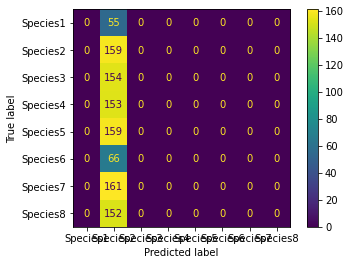

              precision    recall  f1-score   support

    Species1       0.00      0.00      0.00        55
    Species2       0.15      1.00      0.26       159
    Species3       0.00      0.00      0.00       154
    Species4       0.00      0.00      0.00       153
    Species5       0.00      0.00      0.00       159
    Species6       0.00      0.00      0.00        66
    Species7       0.00      0.00      0.00       161
    Species8       0.00      0.00      0.00       152

    accuracy                           0.15      1059
   macro avg       0.02      0.12      0.03      1059
weighted avg       0.02      0.15      0.04      1059



In [46]:
testModel(valid_gen, vgg16)

#inceptionV3

In [55]:
supernet = tfk.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(96,96,3)
)

87910968/87910968 [==============================] - 0s 0us/step


In [56]:
for layer in supernet.layers:
    layer.trainable = False

In [57]:
inceptionV3 = pre_build_model(input_shape)
inceptionV3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 96, 96, 3)]       0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 Flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 Classifier (Dense)          (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0     

In [58]:
# Create folders and callbacks and fit
noaug_callbacks = create_folders_and_callbacks(model_name='CNN_InvV3')

# Train the model
history = inceptionV3.fit(
    x = noaug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = noaug_callbacks,
).history

Epoch 1/200
311/311 [==============================] - 22s 54ms/step - loss: 1.8453 - accuracy: 0.3343 - val_loss: 1.5774 - val_accuracy: 0.4193
Epoch 2/200
311/311 [==============================] - 18s 58ms/step - loss: 1.5106 - accuracy: 0.4329 - val_loss: 1.5187 - val_accuracy: 0.4363
Epoch 3/200
311/311 [==============================] - 17s 54ms/step - loss: 1.3664 - accuracy: 0.5014 - val_loss: 1.5676 - val_accuracy: 0.4353
Epoch 4/200
311/311 [==============================] - 16s 51ms/step - loss: 1.2099 - accuracy: 0.5485 - val_loss: 1.4650 - val_accuracy: 0.4627
Epoch 5/200
311/311 [==============================] - 15s 49ms/step - loss: 1.0922 - accuracy: 0.6013 - val_loss: 1.4954 - val_accuracy: 0.4504
Epoch 6/200
311/311 [==============================] - 15s 49ms/step - loss: 0.9603 - accuracy: 0.6609 - val_loss: 1.5499 - val_accuracy: 0.4448
Epoch 7/200
311/311 [==============================] - 15s 49ms/step - loss: 0.8429 - accuracy: 0.6871 - val_loss: 1.7487 - val_ac

In [64]:
# Save best epoch model
inceptionV3.save("data_augmentation_experiments/CNN_InceptionV3_Best")

In [68]:
inceptionV3.load_weights("data_augmentation_experiments/CNN_InceptionV3_Best")

In [66]:
new = tfk.models.load_model("data_augmentation_experiments/CNN_InceptionV3_Best")

133/133 [==============================] - 3s 21ms/step
val labels:  [0 0 0 ... 7 7 7]
labels predicted:  [0 4 4 ... 1 0 3]


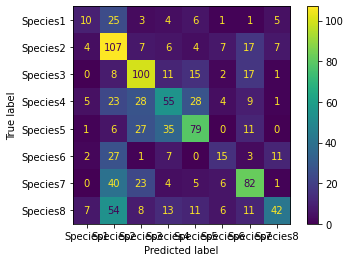

              precision    recall  f1-score   support

    Species1       0.34      0.18      0.24        55
    Species2       0.37      0.67      0.48       159
    Species3       0.51      0.65      0.57       154
    Species4       0.41      0.36      0.38       153
    Species5       0.53      0.50      0.51       159
    Species6       0.37      0.23      0.28        66
    Species7       0.54      0.51      0.53       161
    Species8       0.62      0.28      0.38       152

    accuracy                           0.46      1059
   macro avg       0.46      0.42      0.42      1059
weighted avg       0.48      0.46      0.45      1059



In [69]:
testModel(valid_gen, inceptionV3)

133/133 [==============================] - 4s 23ms/step
val labels:  [0 0 0 ... 7 7 7]
labels predicted:  [0 4 4 ... 1 0 3]


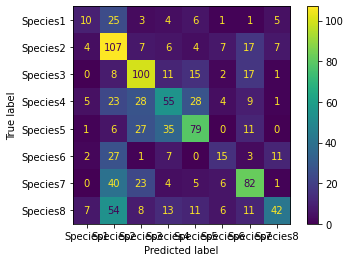

              precision    recall  f1-score   support

    Species1       0.34      0.18      0.24        55
    Species2       0.37      0.67      0.48       159
    Species3       0.51      0.65      0.57       154
    Species4       0.41      0.36      0.38       153
    Species5       0.53      0.50      0.51       159
    Species6       0.37      0.23      0.28        66
    Species7       0.54      0.51      0.53       161
    Species8       0.62      0.28      0.38       152

    accuracy                           0.46      1059
   macro avg       0.46      0.42      0.42      1059
weighted avg       0.48      0.46      0.45      1059



In [67]:
testModel(valid_gen, new)

##Data augmentation

Rotation: {'theta': -7.527592869158251, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Shift: {'theta': 0, 'tx': 0, 'ty': 38, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Zoom: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 0.9247240713084175, 'zy': 1.2704285838459497, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 

Flip: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 1, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': None} 



Text(0.5, 1.0, 'Flipped')

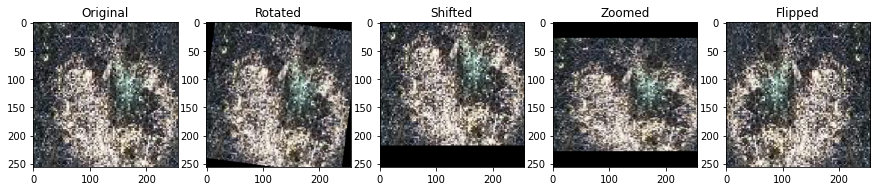

In [ ]:
# Create some augmentation examples
# Get sample image
image = next(train_gen)[0][4]

# Create an instance of ImageDataGenerator for each transformation
rot_gen = ImageDataGenerator(rotation_range=30)
shift_gen = ImageDataGenerator(width_shift_range=50)
zoom_gen = ImageDataGenerator(zoom_range=0.3)
flip_gen = ImageDataGenerator(horizontal_flip=True)

# Get random transformations
rot_t = rot_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Rotation:', rot_t, '\n')
shift_t = shift_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Shift:', shift_t, '\n')
zoom_t = zoom_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Zoom:', zoom_t, '\n')
flip_t = flip_gen.get_random_transform(img_shape=(256, 256), seed=seed)
print('Flip:', flip_t, '\n')

# Apply the transformation
gen = ImageDataGenerator(fill_mode='constant', cval=0.)
rotated = gen.apply_transform(image, rot_t)
shifted = gen.apply_transform(image, shift_t) 
zoomed = gen.apply_transform(image, zoom_t) 
flipped = gen.apply_transform(image, flip_t)  

# Plot original and augmented images
fig, ax = plt.subplots(1, 5, figsize=(15, 45))
ax[0].imshow(np.uint8(image))
ax[0].set_title('Original')
ax[1].imshow(np.uint8(rotated))
ax[1].set_title('Rotated')
ax[2].imshow(np.uint8(shifted))
ax[2].set_title('Shifted')
ax[3].imshow(np.uint8(zoomed))
ax[3].set_title('Zoomed')
ax[4].imshow(np.uint8(flipped))
ax[4].set_title('Flipped')

Transform: {'theta': -7.527592869158251, 'tx': -28, 'ty': 42, 'shear': 0, 'zx': 1.059195090518222, 'zy': 0.7936111842654618, 'flip_horizontal': 1, 'flip_vertical': 1, 'channel_shift_intensity': None, 'brightness': None}


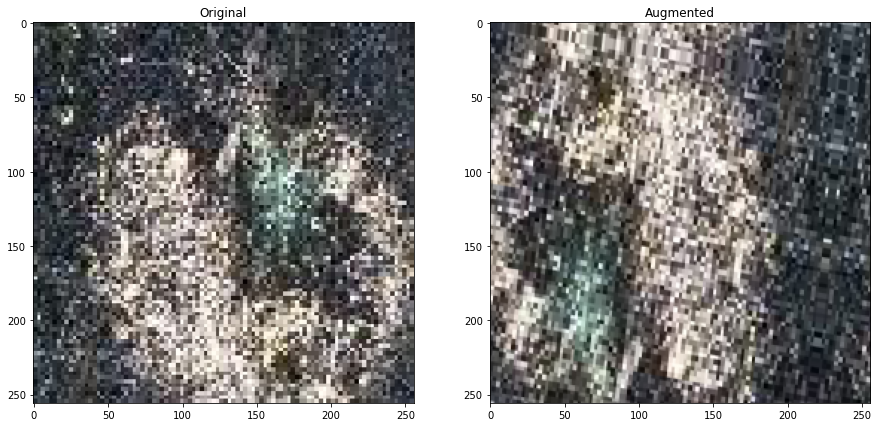

In [ ]:
# Combine multiple transformations
gen = ImageDataGenerator(rotation_range=30,
                         height_shift_range=50,
                         width_shift_range=50,
                         zoom_range=0.3,
                         horizontal_flip=True,
                         vertical_flip=True, 
                         fill_mode='reflect')

# Get random transformation
t = gen.get_random_transform(img_shape=(256, 256), seed=seed)
print("Transform:", t)

# Apply the transformation
augmented = gen.apply_transform(image, t)

# Plot original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(15,30))
ax[0].imshow(np.uint8(image))
ax[0].set_title("Original")
ax[1].imshow(np.uint8(augmented))
ax[1].set_title("Augmented")
plt.show()

In [ ]:
# Create an instance of ImageDataGenerator with Data Augmentation
aug_train_data_gen = ImageDataGenerator(rotation_range=30,
                                        height_shift_range=50,
                                        width_shift_range=50,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True, 
                                        fill_mode='reflect',
                                        rescale=1/255.) # rescale value is multiplied to the image

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                                       target_size=(96,96),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)

Found 2483 images belonging to 8 classes.


In [ ]:
# Build model (for data augmentation training)
model = build_model(input_shape)

In [ ]:
# Create folders and callbacks and fit
aug_callbacks = create_folders_and_callbacks(model_name='CNN_Aug')

# Train the model
history = model.fit(
    x = aug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = aug_callbacks,
).history

Epoch 1/200
311/311 [==============================] - 49s 153ms/step - loss: 2.3319 - accuracy: 0.1542 - val_loss: 2.0501 - val_accuracy: 0.1549
Epoch 2/200
311/311 [==============================] - 48s 155ms/step - loss: 2.0143 - accuracy: 0.1627 - val_loss: 2.0127 - val_accuracy: 0.1492
Epoch 3/200
311/311 [==============================] - 48s 156ms/step - loss: 1.8429 - accuracy: 0.2686 - val_loss: 1.9329 - val_accuracy: 0.2389
Epoch 4/200
311/311 [==============================] - 47s 151ms/step - loss: 1.7867 - accuracy: 0.3166 - val_loss: 1.8762 - val_accuracy: 0.2890
Epoch 5/200
311/311 [==============================] - 47s 152ms/step - loss: 1.7226 - accuracy: 0.3323 - val_loss: 1.7232 - val_accuracy: 0.3258
Epoch 6/200
311/311 [==============================] - 47s 150ms/step - loss: 1.6384 - accuracy: 0.3721 - val_loss: 1.5243 - val_accuracy: 0.4240
Epoch 7/200
311/311 [==============================] - 48s 155ms/step - loss: 1.5519 - accuracy: 0.4197 - val_loss: 1.3851 -

In [ ]:
# Save best epoch model
model.save("data_augmentation_experiments/CNN_Aug_Best")